# Lab 1.2 - Convolutional Neural Network (CNN) Lab

In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

## **Step 1: Import library**

In [2]:
import numpy as np
from numpy.random import seed
seed(42)
from matplotlib import pyplot
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [3]:
nb_epochs = 300
batch_size = 32
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}


In [4]:
cifar = tf.keras.datasets.cifar10

## **Step 2: Load data**

In [5]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000,)

In [8]:
y_test.shape

(10000,)

## **Step 3: Visualize example data**

In [9]:
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap=plt.cm.binary)
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)

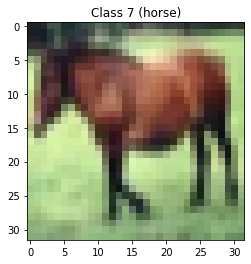

In [10]:
draw_img(7)

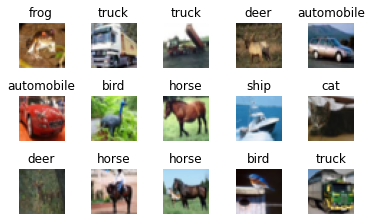

In [11]:
draw_sample(x_train, y_train, 0, 3, 5)

## **Step 4: Create Convolutional Neural Network (CNN)**

> We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values

The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

Dense layers have 512 neurons and activation function is 'relu'.

Dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . 

Our model have architecture belowing:


In [12]:
input = Input(shape = (32,32,3))
conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input)
conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten_layer = Flatten()(pool2)

hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
drop_layer = Dropout(0.2)(hidden_layer)
hidden_layer2 = Dense(256, activation = 'relu')(drop_layer)
pred = Dense(10, activation = 'softmax')(hidden_layer2)
model = Model(inputs = input, outputs = pred)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0     

## **Step 5: Loss,  Optimizer, Early stopping**

In [13]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

## **Step 6: Fit model**

In [14]:
h = model.fit(x_train, y_train, batch_size=32, epochs=16,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
50000/50000 [==============================] - 39s 774us/sample - loss: 1.4783 - accuracy: 0.4618 - val_loss: 1.1712 - val_accuracy: 0.5800
Epoch 2/16
50000/50000 [==============================] - 38s 752us/sample - loss: 1.0891 - accuracy: 0.6161 - val_loss: 0.9889 - val_accuracy: 0.6492
Epoch 3/16
50000/50000 [==============================] - 37s 747us/sample - loss: 0.9080 - accuracy: 0.6807 - val_loss: 0.9174 - val_accuracy: 0.6800
Epoch 4/16
50000/50000 [==============================] - 38s 768us/sample - loss: 0.7758 - accuracy: 0.7263 - val_loss: 0.8464 - val_accuracy: 0.7052
Epoch 5/16
50000/50000 [==============================] - 38s 759us/sample - loss: 0.6751 - accuracy: 0.7610 - val_loss: 0.8205 - val_accuracy: 0.7220
Epoch 6/16
50000/50000 [==============================] - 37s 744us/sample - loss: 0.5810 - accuracy: 0.7962 - val_loss: 0.8988 - val_accuracy: 0.7039
Epoch 7/16
50000/50000 [====================

## **Step 7: Plot loss and accuracy**


In [15]:
history_dict = h.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0, 0.5, 'Loss')

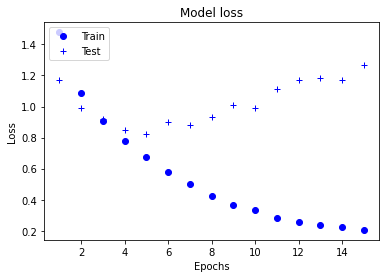

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

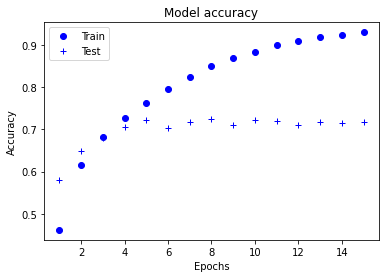

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

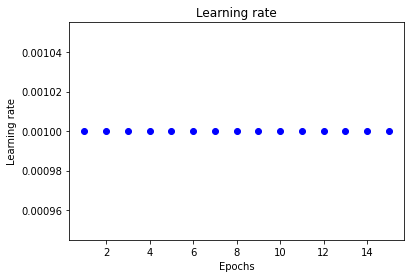

In [18]:
lr_values = history_dict['lr']

plt.plot(epochs, lr_values, 'bo')
plt.title('Learning rate')
plt.xlabel('Epochs')
plt.ylabel('Learning rate')

plt.show()

## **Step 8: Evaluate**

In [19]:
loss, accuracy = model.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.972480  ;  loss = 0.092060


In [20]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.716200  ;  loss = 1.264522


## **Step 9 : Confusion matrix**

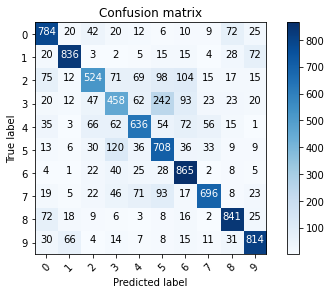

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## **Step 10: Inspecting output**

In [22]:
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [23]:
print("Number of true predictions: ", len(correct_indices))
print("Number of false predictions:", len(incorrect_indices))

Number of true predictions:  7162
Number of false predictions: 2838


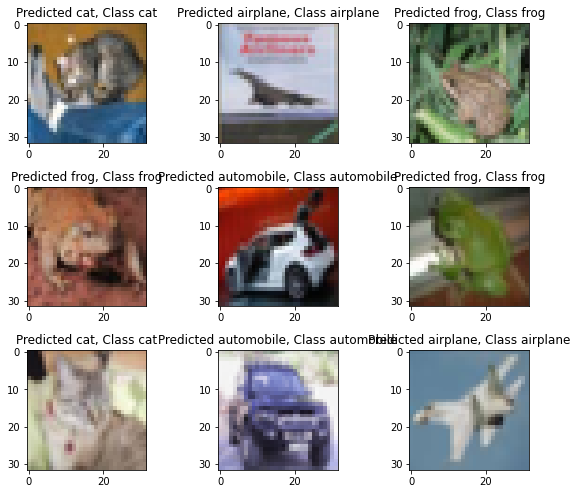

In [24]:
plt.rcParams['figure.figsize'] = (9,9) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[correct]], class_name[y_test[correct]]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)

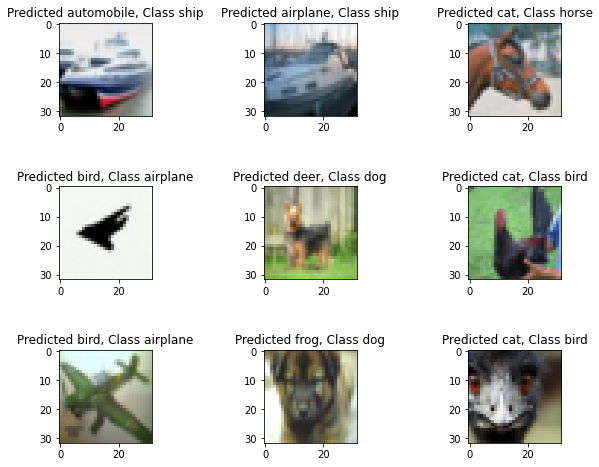

In [25]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[incorrect]], class_name[y_test[incorrect]]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

# **Data Augmentation**

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [ ]:
datagen.fit(x_train)

## Show darkening and lightening different on data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


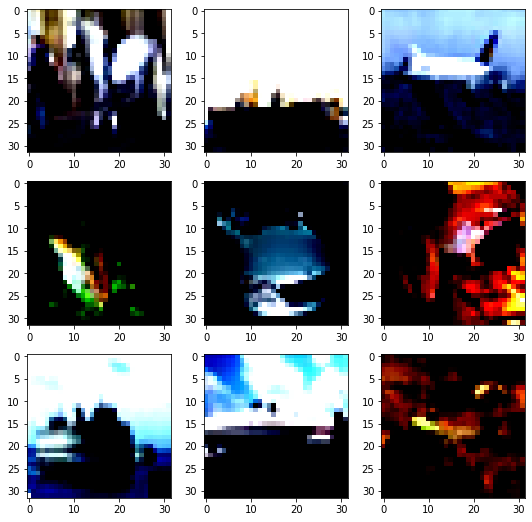

In [ ]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## ZCA Whitening
A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..2

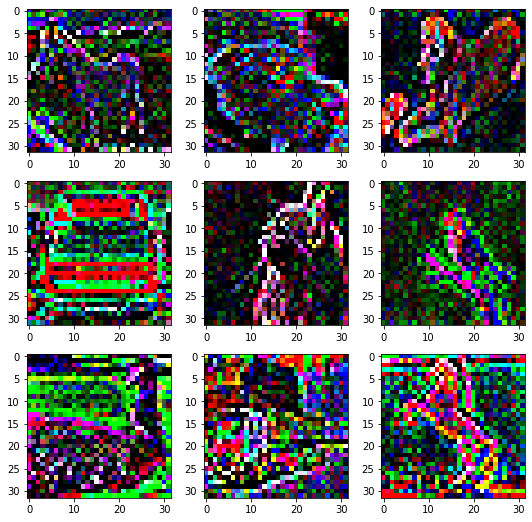

In [ ]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(x_train)
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Random Rotations
Sometimes images in your sample data may have varying and different rotations in the scene.

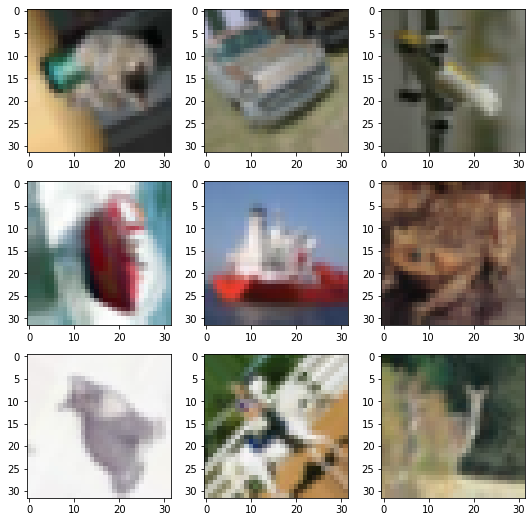

In [ ]:
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(x_train)
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Random Shifts
Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways.

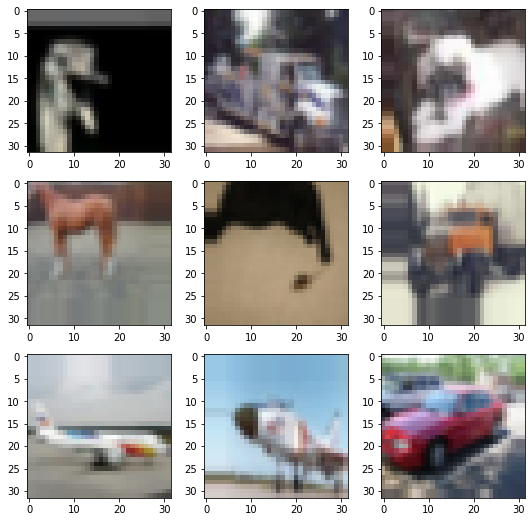

In [ ]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(x_train)
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Fit Model

In [ ]:
datagen = ImageDataGenerator(
            featurewise_center=True,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
history_2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size = 128), epochs =nb_epochs,
            verbose=1,validation_data=(x_test, y_test))

Epoch 1/300
391/391 [==============================] - 20s 52ms/step - loss: 1.0941 - accuracy: 0.6452 - val_loss: 0.9851 - val_accuracy: 0.6621
Epoch 2/300
391/391 [==============================] - 20s 51ms/step - loss: 0.8357 - accuracy: 0.7154 - val_loss: 1.0394 - val_accuracy: 0.6485
Epoch 3/300
391/391 [==============================] - 20s 52ms/step - loss: 0.7878 - accuracy: 0.7294 - val_loss: 1.0212 - val_accuracy: 0.6538
Epoch 4/300
391/391 [==============================] - 20s 51ms/step - loss: 0.7668 - accuracy: 0.7364 - val_loss: 0.9913 - val_accuracy: 0.6637
Epoch 5/300
391/391 [==============================] - 20s 51ms/step - loss: 0.7358 - accuracy: 0.7461 - val_loss: 1.0107 - val_accuracy: 0.6538
Epoch 6/300
391/391 [==============================] - 20s 51ms/step - loss: 0.7244 - accuracy: 0.7513 - val_loss: 0.9758 - val_accuracy: 0.6643
Epoch 7/300
391/391 [==============================] - 20s 51ms/step - loss: 0.7065 - accuracy: 0.7551 - val_loss: 0.9619 - val_ac

## Evaluate

In [ ]:
loss, accuracy = model.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [ ]:
history_dict = history_2.history
history_dict.keys()

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))